<a href="https://colab.research.google.com/github/Frans-Grau/ElectricVehicleVsChargingStations/blob/main/EVPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
import pandas as pd
import plotly.express as px

CPU times: total: 297 ms
Wall time: 1.59 s


In [2]:
%%time
url = "https://raw.githubusercontent.com/Frans-Grau/ElectricVehicleVsChargingStations/main/Datasets/EVPopulation.csv"
df=pd.read_csv(url)

CPU times: total: 62.5 ms
Wall time: 7 s


In [3]:
%%time
df.head()

CPU times: total: 0 ns
Wall time: 0 ns


VIN (1-10)     County       City State  Postal Code  Model Year  \
0  WDC0G5EB7K     Louisa    Bumpass    VA        23024        2019   
1  5YJYGDEE8L   Kittitas   Cle Elum    WA        98922        2020   
2  5YJ3E1EBXL     Chelan     Chelan    WA        98816        2020   
3  5YJ3E1EA5J  Snohomish  Snohomish    WA        98290        2018   
4  1FADP5CU1E   Thurston   Tumwater    WA        98512        2014   

            Make      Model                   Electric Vehicle Type  \
0  MERCEDES-BENZ  GLC-CLASS  Plug-in Hybrid Electric Vehicle (PHEV)   
1          TESLA    MODEL Y          Battery Electric Vehicle (BEV)   
2          TESLA    MODEL 3          Battery Electric Vehicle (BEV)   
3          TESLA    MODEL 3          Battery Electric Vehicle (BEV)   
4           FORD      C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range              10   
1           Clean Alternative Fuel Vehicle Eligible             291   
2           Clean Alternative Fuel Vehicle Eligible             322   
3           Clean Alternative Fuel Vehicle Eligible             215   
4             Not eligible due to low battery range              19   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       153874850   
1          0                  13.0       109455524   
2          0                  12.0       124022020   
3          0                  39.0       235141224   
4          0                  22.0       141584306   

              Vehicle Location           Electric Utility  2020 Census Tract  
0   POINT (-77.73727 37.96459)                        NaN        51109950101  
1    POINT (-120.93943 47.195)     PUGET SOUND ENERGY INC        53037975104  
2  POINT (-120.01454 47.83985)  PUD NO 1 OF CHELAN COUNTY        53007960302  
3  POINT (-122.09305 47.91265)     PUGET SOUND ENERGY INC        53061052105  
4   POINT (-122.92057 47.0031)     PUGET SOUND ENERGY INC        53067010920

In [4]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114600 entries, 0 to 114599
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         114600 non-null  object 
 1   County                                             114600 non-null  object 
 2   City                                               114600 non-null  object 
 3   State                                              114600 non-null  object 
 4   Postal Code                                        114600 non-null  int64  
 5   Model Year                                         114600 non-null  int64  
 6   Make                                               114600 non-null  object 
 7   Model                                              114516 non-null  object 
 8   Electric Vehicle Type                              114600 non-null  object

In [5]:
%%time
df.describe()

CPU times: total: 15.6 ms
Wall time: 58.1 ms


Postal Code     Model Year  Electric Range      Base MSRP  \
count  114600.000000  114600.000000   114600.000000  114600.000000   
mean    98153.790471    2019.103464       84.953874    1741.790838   
std      2688.311829       2.918600      101.462639   10621.851421   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       30.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         114312.000000    1.146000e+05       1.146000e+05  
mean              29.794519    2.010841e+08       5.296793e+10  
std               14.703917    9.188550e+07       1.680116e+09  
min                1.000000    4.777000e+03       1.081042e+09  
25%               18.000000    1.501399e+08       5.303301e+10  
50%               34.000000    1.939816e+08       5.303303e+10  
75%               43.000000    2.205000e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

## EDA on the filtered DF -> State = Washington

In [6]:
%%time
### Filter dfEV to just values in WA and save into a new dataframe
df1 = df[df['State']=='WA']

CPU times: total: 0 ns
Wall time: 27.2 ms


In [12]:
%%time
### Check for Null values -> the whole df
df.isna().sum()

CPU times: total: 15.6 ms
Wall time: 153 ms


VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 84
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 288
DOL Vehicle ID                                         0
Vehicle Location                                      30
Electric Utility                                     447
2020 Census Tract                                      0
dtype: int64

In [13]:
%%time
##Value Counts
df.City.value_counts()

CPU times: total: 0 ns
Wall time: 9.52 ms


Seattle                20619
Bellevue                5991
Redmond                 4282
Vancouver               4108
Kirkland                3639
                       ...  
Fort George G Meade        1
Honolulu                   1
Fairbanks                  1
Warner Robins              1
Hartline                   1
Name: City, Length: 639, dtype: int64

In [10]:
### County information
dfWA.groupBy('County').count().orderBy('count', ascending=False).show()

+------------+-----+
|      County|count|
+------------+-----+
|        King|60005|
|   Snohomish|12686|
|      Pierce| 8670|
|       Clark| 6824|
|    Thurston| 4179|
|      Kitsap| 3880|
|     Whatcom| 2873|
|     Spokane| 2828|
|      Benton| 1394|
|      Island| 1297|
|      Skagit| 1240|
|     Clallam|  737|
|    San Juan|  724|
|   Jefferson|  699|
|      Chelan|  653|
|      Yakima|  633|
|     Cowlitz|  575|
|       Mason|  554|
|       Lewis|  437|
|Grays Harbor|  397|
+------------+-----+
only showing top 20 rows



In [11]:
### City Information
dfWA.groupBy('City').count().orderBy('count', ascending=False).show(2)

### Count of distinct cities 
dfWA.select('City').distinct().count()

+--------+-----+
|    City|count|
+--------+-----+
| Seattle|20591|
|Bellevue| 5986|
+--------+-----+
only showing top 2 rows



441

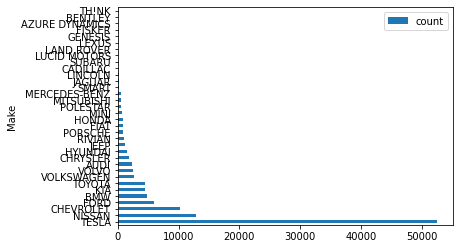

In [12]:
### CAR MAKERS: Value Counts and use pnadas to plot
makers = dfWA.groupBy('Make').count().orderBy('count', ascending=False)
p_makers = makers.toPandas()
p_makers = p_makers.set_index('Make')
p_makers.plot(kind='barh')

CPU times: total: 46.9 ms
Wall time: 1.38 s


<AxesSubplot:>

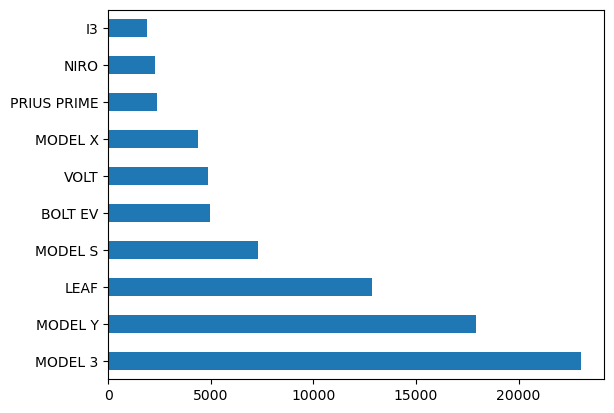

In [17]:
%%time
df1 = df.Model.value_counts().sort_values(ascending=False)
df1[:10].plot(kind='barh')

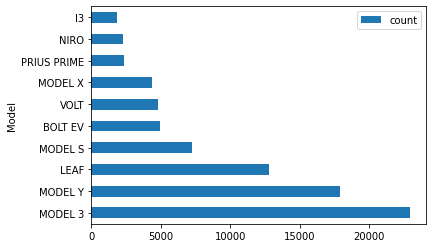

In [13]:
### CAR MODELS: Value Counts and use paadas to plot
models = dfWA.groupBy('Model').count().orderBy('count', ascending=False)
p_models = models.toPandas()
p_models.set_index('Model', inplace=True)
p_models[:10].plot(kind='barh')

In [15]:
### TODO:
# Predict 'Electric Range' to change the 0 range values
range = dfWA.groupBy('Electric Range').count().orderBy('count', ascending=False)
range.show(2)


+--------------+-----+
|Electric Range|count|
+--------------+-----+
|             0|41429|
|           215| 6213|
+--------------+-----+
only showing top 2 rows



### Predicting Missing Electric Range

In [16]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import isnan, when, count, col, round
from pyspark.sql.types import IntegerType

In [17]:
df_original = dfWA
# Define the input columns for the string indexer
input_cols = ['County', 'City', 'State', 'Make', 'Model',
              'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
              'Legislative District', 'Vehicle Location', 'Electric Utility']

# Define the output columns for the string indexer
output_cols = [col + "_indexed" for col in input_cols]

# Create the string indexer
string_indexer = StringIndexer(inputCols=input_cols, outputCols=output_cols)

# Fit the string indexer to the data
string_indexer_model = string_indexer.fit(df_original)

# Transform the data to create the indexed columns
df_indexed = string_indexer_model.transform(df_original)


# Define the input columns for the one-hot encoder
input_cols = output_cols

# Define the output columns for the one-hot encoder
output_cols_enc = [col + "_encoded" for col in input_cols]

# Create the one-hot encoder
encoder = OneHotEncoder(inputCols=input_cols, outputCols=output_cols_enc)

# Transform the data to create the one-hot encoded columns
encoder.setDropLast(False)
ohe = encoder.fit(df_indexed) 
df_indexed = ohe.transform(df_indexed)
df_encoded = df_indexed


### vector assembler
input_cols = output_cols_enc
vector_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
df_original=vector_assembler.transform(df_encoded)


In [18]:
# Split the dataset into training and test sets
training_data, test_data = df_original.randomSplit([0.7, 0.3], seed=123)

# Train the model
lr = LinearRegression(featuresCol='features', labelCol='Electric Range', maxIter=10, regParam=0.3, elasticNetParam=0.8)
model = lr.fit(training_data)

# Make predictions on the test set
predictions = model.transform(test_data)

In [19]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Electric Range", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
rmse

4.100195931768802

In [20]:
# Make predictions final df
predictions1 = model.transform(df_original)
predictions1.select('Electric Range', 'prediction').show(10, False)

### Prepare the final DF
df_final = predictions1.select('County','City','State','Make','Model'\
                               ,'Postal Code','Model Year','Electric Vehicle Type'\
                               ,'Base MSRP','DOL Vehicle ID','2020 Census Tract'\
                               ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility'\
                               ,'Legislative District','Vehicle Location','Electric Utility'\
                               ,'Electric Range','prediction')

df_final = df_final.withColumn('Range', when(col('Electric Range')!=0,col('Electric Range')).otherwise(df_final.prediction))
df_final = df_final.withColumn("Range", df_final["Range"].cast(IntegerType()))

+--------------+------------------+
|Electric Range|prediction        |
+--------------+------------------+
|291           |287.31510790199917|
|322           |319.7260079361203 |
|215           |213.85901205156904|
|19            |18.902792529801914|
|19            |21.49640674258343 |
|151           |148.0679790965724 |
|204           |199.75048255729482|
|150           |147.21145424755412|
|322           |319.7260079361203 |
|150           |147.21145424755412|
+--------------+------------------+
only showing top 10 rows



In [21]:
df_final.show()

+-----------+------------+-----+----------+--------+-----------+----------+---------------------+---------+--------------+-----------------+-------------------------------------------------+--------------------+--------------------+--------------------+--------------+------------------+-----+
|     County|        City|State|      Make|   Model|Postal Code|Model Year|Electric Vehicle Type|Base MSRP|DOL Vehicle ID|2020 Census Tract|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Legislative District|    Vehicle Location|    Electric Utility|Electric Range|        prediction|Range|
+-----------+------------+-----+----------+--------+-----------+----------+---------------------+---------+--------------+-----------------+-------------------------------------------------+--------------------+--------------------+--------------------+--------------+------------------+-----+
|   Kittitas|    Cle Elum|   WA|     TESLA| MODEL Y|      98922|      2020| Battery Electric ...|        0|     109455

In [22]:
df_final2 = df_final.select('County','City','State','Make','Model'\
                               ,'Postal Code','Model Year','Electric Vehicle Type'\
                               ,'Base MSRP','DOL Vehicle ID','2020 Census Tract'\
                               ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility'\
                               ,'Legislative District','Vehicle Location','Electric Utility'\
                               ,'Range')

df_original1 = df_final2

In [23]:
df_original1

DataFrame[County: string, City: string, State: string, Make: string, Model: string, Postal Code: int, Model Year: int, Electric Vehicle Type: string, Base MSRP: int, DOL Vehicle ID: int, 2020 Census Tract: bigint, Clean Alternative Fuel Vehicle (CAFV) Eligibility: string, Legislative District: int, Vehicle Location: string, Electric Utility: string, Range: int]

In [24]:
df_final2 = df_final.select('County','City','State','Make','Model'\
                               ,'Postal Code','Model Year','Electric Vehicle Type'\
                               ,'Base MSRP','DOL Vehicle ID','2020 Census Tract'\
                               ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility'\
                               ,'Legislative District','Vehicle Location','Electric Utility'\
                               ,'Range')

df_original1 = df_final2
# Define the input columns for the string indexer
input_cols = ['County', 'City', 'State', 'Make', 'Model',
              'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Range',
              'Legislative District', 'Vehicle Location', 'Electric Utility']

# Define the output columns for the string indexer
output_cols = [col + "_indexed" for col in input_cols]

# Create the string indexer
string_indexer = StringIndexer(inputCols=input_cols, outputCols=output_cols)

# Fit the string indexer to the data
string_indexer_model = string_indexer.fit(df_original1)

# Transform the data to create the indexed columns
df_indexed = string_indexer_model.transform(df_original1)


# Define the input columns for the one-hot encoder
input_cols = output_cols

# Define the output columns for the one-hot encoder
output_cols_enc = [col + "_encoded" for col in input_cols]

# Create the one-hot encoder
encoder = OneHotEncoder(inputCols=input_cols, outputCols=output_cols_enc)

# Transform the data to create the one-hot encoded columns
encoder.setDropLast(False)
ohe = encoder.fit(df_indexed) 
df_indexed = ohe.transform(df_indexed)
df_encoded = df_indexed


### vector assembler
input_cols = output_cols_enc
vector_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
df_original1=vector_assembler.transform(df_encoded)

# Split the dataset into training and test sets
training_data, test_data = df_original1.randomSplit([0.7, 0.3], seed=123)

# Train the model
lr = LinearRegression(featuresCol='features', labelCol='Range', maxIter=10, regParam=0.3, elasticNetParam=0.8)
model = lr.fit(training_data)

# Make predictions on the test set
predictions1 = model.transform(test_data)

# Make predictions final df
predictions2 = model.transform(df_original1)

### Prepare the final DF
df_final1 = predictions2.select('County','City','State','Make','Model'\
                               ,'Postal Code','Model Year','Electric Vehicle Type'\
                               ,'Base MSRP','DOL Vehicle ID','2020 Census Tract'\
                               ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility'\
                               ,'Legislative District','Vehicle Location','Electric Utility'\
                               ,'Range','prediction')

df_final1 = df_final1.withColumn('Range2', when(col('Range')>0,col('Range')).otherwise(0))
df_final1 = df_final1.withColumn("Range2", df_final1["Range2"].cast(IntegerType()))
df_final1.select('Range','Range2','prediction').show()

+-----+------+------------------+
|Range|Range2|        prediction|
+-----+------+------------------+
|  291|   291|289.49987707436276|
|  322|   322|319.58925959068966|
|  215|   215|215.11917894013942|
|   19|    19|18.712095135877192|
|   19|    19|18.712095135877192|
|  151|   151|147.74532000004365|
|  204|   204|197.42674799233953|
|  150|   150|146.88498113922685|
|  322|   322|319.58925959068966|
|  150|   150|146.88498113922685|
|  215|   215|215.11917894013942|
|   26|    26|34.046511688359345|
|  151|   151|147.74532000004365|
|  151|   151|147.74532000004365|
|   73|    73|  74.7028291742485|
|   84|    84| 84.11257000450566|
|  220|   220| 220.3926068215619|
|   -4|     0|0.7952274729847915|
|  125|   125| 120.3947034334201|
|   84|    84| 84.11257000450566|
+-----+------+------------------+
only showing top 20 rows



In [25]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol="Range", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions2)
rmse

3.690646500068349

In [26]:
df_final1.filter(col('Range2')==0).count()

21544

In [28]:
from pyspark.sql.functions import greatest

In [29]:
df_final1 = df_final1.withColumn("Max_Range", greatest(df_final1["Range"], df_final1["Range2"], df_final1["prediction"]))

In [27]:
df_final1.filter(col('Range2')==0).show()

+---------+-----------------+-----+----------+--------------+-----------+----------+---------------------+---------+--------------+-----------------+-------------------------------------------------+--------------------+--------------------+--------------------+-----+-------------------+------+
|   County|             City|State|      Make|         Model|Postal Code|Model Year|Electric Vehicle Type|Base MSRP|DOL Vehicle ID|2020 Census Tract|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Legislative District|    Vehicle Location|    Electric Utility|Range|         prediction|Range2|
+---------+-----------------+-----+----------+--------------+-----------+----------+---------------------+---------+--------------+-----------------+-------------------------------------------------+--------------------+--------------------+--------------------+-----+-------------------+------+
|  Stevens|             Rice|   WA| CHEVROLET|      BOLT EUV|      99167|      2023| Battery Electric ...|      